In [169]:
!pip freeze > requirements.txt
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
from wordcloud import WordCloud
from nltk import FreqDist
import pymorphy2
import re
from plotly.figure_factory import create_distplot
import emoji
from collections import Counter
morphy = pymorphy2.MorphAnalyzer()

In [77]:
dataset = pd.read_csv("datasets/Yandex Taxi Export (1).csv")

In [78]:
#data at a glance
dataset.head()

,date,conversation_id,essid,lemmas,sentiment,tweet,username
0,"Jan 18, 2021 @ 14:22:49.000","1,113,345,882,328,633,344",yandex_go,самый необычный яндекс такси,0.5,@tn_kzn Самое необычное имя в яндекс такси ht...,xdwndx
1,"Jan 16, 2021 @ 23:13:19.000","1,116,682,699,094,265,984",yandex_go,дополнение новохоперск настолько маленький раб...,1.0,Дополнение про Новохопёрск: он настолько мален...,alexey4e
2,"Jan 6, 2021 @ 08:44:58.000","1,135,161,095,163,928,704",yandex_go,яндекс подготовить материал разнообразный фина...,0.5,46. Яндекс подготовил материал с разнообразной...,Rational_Answer
3,"Jan 10, 2021 @ 17:39:14.000","1,151,861,530,373,369,856",yandex_go,здравствовать водитель должный отменять заказ ...,0.0,"@Oleg100001 Здравствуйте! Конечно, водитель не...",Uber_Russia
4,"Jan 10, 2021 @ 17:43:04.000","1,151,861,530,373,369,856",yandex_go,позволить проверить написать номер телефон при...,0.5,@Oleg100001 Позвольте нам всё проверить. Напиш...,Uber_Russia


In [79]:
dataset.shape

(4466, 7)

In [80]:
dataset.describe()

,sentiment
count,4466.000000
mean,0.340349
std,0.362172
min,0.000000
25%,0.000000
50%,0.500000
75%,0.500000
max,1.000000


In [81]:
# there are 626 rows for yandex_go 
dataset['username'].value_counts()

yandex_go       626
Uber_Russia     164
Ffrunza58        22
WebOS_su         15
xerogene         13
               ... 
6oyP13            1
funnyuaplus       1
agmorozov         1
Uber_Support      1
toothystitch      1
Name: username, Length: 2931, dtype: int64

In [83]:
#making a copy of the dataset
d_copy = dataset.copy()

## Yandex Analysis

In [85]:
#taking only the tweets where yandex was tagged or called
d_copy = d_copy[d_copy['tweet'].str.contains('@yandex_go|@yandexsupport|яндекс|Яндекс')]

In [86]:
#reproducing index
d_copy.reset_index(drop=True, inplace=True)

In [87]:
# 7 columns and 3504 rows
d_copy.shape

(3504, 7)

In [88]:
#quick look at the data
d_copy.head()

,date,conversation_id,essid,lemmas,sentiment,tweet,username
0,"Jan 18, 2021 @ 14:22:49.000","1,113,345,882,328,633,344",yandex_go,самый необычный яндекс такси,0.5,@tn_kzn Самое необычное имя в яндекс такси ht...,xdwndx
1,"Jan 16, 2021 @ 23:13:19.000","1,116,682,699,094,265,984",yandex_go,дополнение новохоперск настолько маленький раб...,1.0,Дополнение про Новохопёрск: он настолько мален...,alexey4e
2,"Jan 6, 2021 @ 08:44:58.000","1,135,161,095,163,928,704",yandex_go,яндекс подготовить материал разнообразный фина...,0.5,46. Яндекс подготовил материал с разнообразной...,Rational_Answer
3,"Feb 13, 2021 @ 05:31:33.000","1,250,706,870,827,913,216",yandex_go,спб повысить спрос двойной цена дом машина стоить,0.0,"@yandex_go Скажите , а почему у вас в СПб теп...",Olga_liss_
4,"Feb 21, 2021 @ 07:37:04.000","1,250,706,870,827,913,216",yandex_go,хрен подписка яндекс плюс цена такси выше сотн...,0.0,@yandex_go И ещё. Какого хрена у меня по подпи...,netsenko


In [90]:
#grouping sentiments by tweet count
#there are roughly 3 times more hate tweets (0.0)(2112) than positive tweets (1.0)(686)
# 0.0 for negative
# 0.5 for neutral
# 1.0 for positive
d_copy.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)


,sentiment,tweet
0,0.0,1606
1,0.5,1345
2,1.0,553


/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sentiment', ylabel='count'>

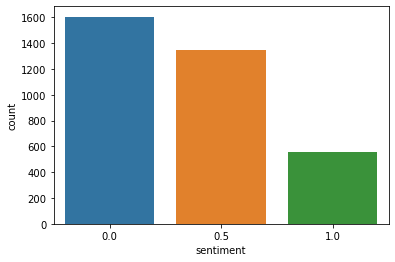

In [91]:
sns.countplot(d_copy['sentiment'])

In [92]:
#let's vizualize it using Funnelarea
#almost 47.3% of all tweets are NEGATIVE tweets while positive tweets makes only 15.4% of the tweets
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()
#fig.write_image("datasets/fig1.png")

In [93]:
#Its hard to properly see when was the first tweet was actually made, so lets change the dateformat
d_copy.sort_values(by=['date']).head()

,date,conversation_id,essid,lemmas,sentiment,tweet,username
1655,"Feb 1, 2021 @ 07:36:50.000","1,356,099,164,036,280,320",yandex_go,короче забывать заплатить долг яндекс такси за...,0.0,Короче Я все время забывала заплатить долг в ...,Our_galaxy__
1653,"Feb 1, 2021 @ 08:09:42.000","1,356,025,294,189,113,344",yandex_go,здравствовать написать номер телефон приложени...,0.5,@laborant5 @yandex_go Здравствуйте! Напишите в...,citymobiltaxi
1656,"Feb 1, 2021 @ 08:25:18.000","1,356,111,363,215,663,104",yandex_go,ааааа сегодняшний спонсор яндекс такси димка о...,0.0,Ааааа сегодняшний спонсор Яндекс Такси - Димка...,vacuum_dm
1654,"Feb 1, 2021 @ 09:30:45.000","1,356,098,052,952,567,808",yandex_go,здравствовать андрей высокий спрос стоимость п...,1.0,"@kuzmichev Здравствуйте, Андрей! Во время высо...",yandex_go
1658,"Feb 1, 2021 @ 09:37:27.000","1,356,129,514,506,628,864",yandex_go,преимущество подписка тысяча фильм сериал кино...,0.5,преимущества подписки: — тысячи фильмов и сери...,sens1milla


In [94]:
#changing dateformat
d_copy['date'] = d_copy.iloc[:,0].apply(lambda x: re.sub("[\@]","",x))
d_copy['date'] = pd.to_datetime(d_copy['date'],format="%b %d, %Y %H:%M:%S.%f" )
d_copy['datetime'] = d_copy['date']
d_copy['date'] = d_copy['datetime'].dt.date
d_copy.head()

,date,conversation_id,essid,lemmas,sentiment,tweet,username,datetime
0,2021-01-18,"1,113,345,882,328,633,344",yandex_go,самый необычный яндекс такси,0.5,@tn_kzn Самое необычное имя в яндекс такси ht...,xdwndx,2021-01-18 14:22:49
1,2021-01-16,"1,116,682,699,094,265,984",yandex_go,дополнение новохоперск настолько маленький раб...,1.0,Дополнение про Новохопёрск: он настолько мален...,alexey4e,2021-01-16 23:13:19
2,2021-01-06,"1,135,161,095,163,928,704",yandex_go,яндекс подготовить материал разнообразный фина...,0.5,46. Яндекс подготовил материал с разнообразной...,Rational_Answer,2021-01-06 08:44:58
3,2021-02-13,"1,250,706,870,827,913,216",yandex_go,спб повысить спрос двойной цена дом машина стоить,0.0,"@yandex_go Скажите , а почему у вас в СПб теп...",Olga_liss_,2021-02-13 05:31:33
4,2021-02-21,"1,250,706,870,827,913,216",yandex_go,хрен подписка яндекс плюс цена такси выше сотн...,0.0,@yandex_go И ещё. Какого хрена у меня по подпи...,netsenko,2021-02-21 07:37:04


In [95]:
#since we don't really need conversation_id and essid, we delete all two of them
d_copy = d_copy.drop(columns=['conversation_id','essid','username'])

In [96]:
#sorting by date
d_copy.sort_values(by=['date']).head()

,date,lemmas,sentiment,tweet,datetime
31,2021-01-01,друг яндекс такси вызов таксист телефонный звонок,0.0,"@loviroyal @Yourchenko_ Друг, это не яндекс та...",2021-01-01 19:24:07
23,2021-01-01,ждать такси минута спускаться минута искать ма...,0.0,Ждали такси 20 минут. Спускаемся через минут 5...,2021-01-01 05:30:17
24,2021-01-01,яндекс такси корн изменить рынок такси подумат...,0.0,"Спасибо Яндекс такси за то, что в корне измени...",2021-01-01 05:50:22
25,2021-01-01,испортить настроение юзай такси ущерб нету отд...,0.0,Хочешь испортить настроение на нг - юзай @yand...,2021-01-01 07:43:12
26,2021-01-01,утро утащить кися домой лечь кроватка хер плав...,0.0,8 утра. Можно мне просто утащить кисю домой и ...,2021-01-01 08:10:07


In [101]:
date_sentiment = d_copy[['date','sentiment']]
ds_negative = date_sentiment[date_sentiment['sentiment'] == 0.0]
ds_neutral = date_sentiment[date_sentiment['sentiment'] == 0.5]
ds_positive = date_sentiment[date_sentiment['sentiment'] == 1.0]

AxesSubplot(0.125,0.125;0.775x0.755)


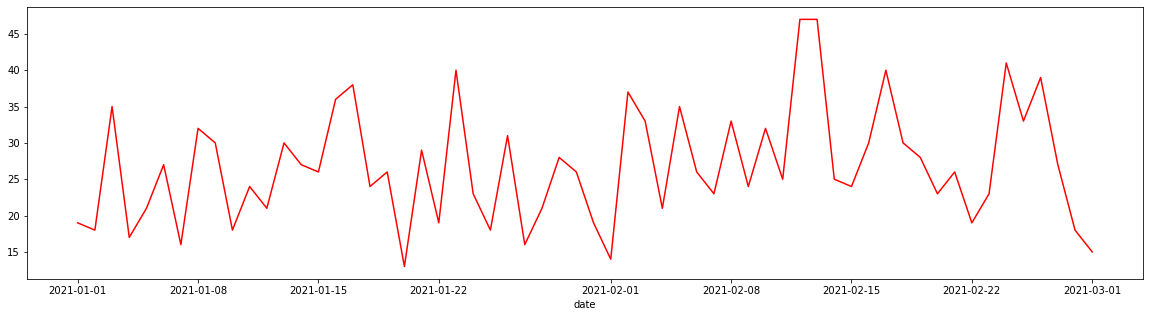

In [105]:
#Vizualizing each sentiment type by dates
#Starting from february month, the number of unsatisfied tweets has sligthly increased
#February 2 was peak of neutral tweets
#January 16 was peak of positive tweets
print(ds_negative.groupby('date').count()['sentiment'].plot(figsize=([20,5]), color='red'))

AxesSubplot(0.125,0.125;0.775x0.755)


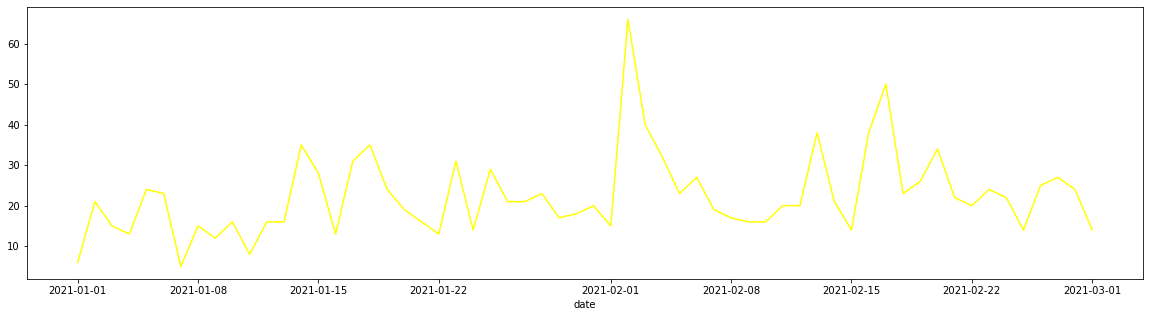

In [108]:
print(ds_neutral.groupby('date').count()['sentiment'].plot(figsize=([20,5]), color='yellow'))

AxesSubplot(0.125,0.125;0.775x0.755)


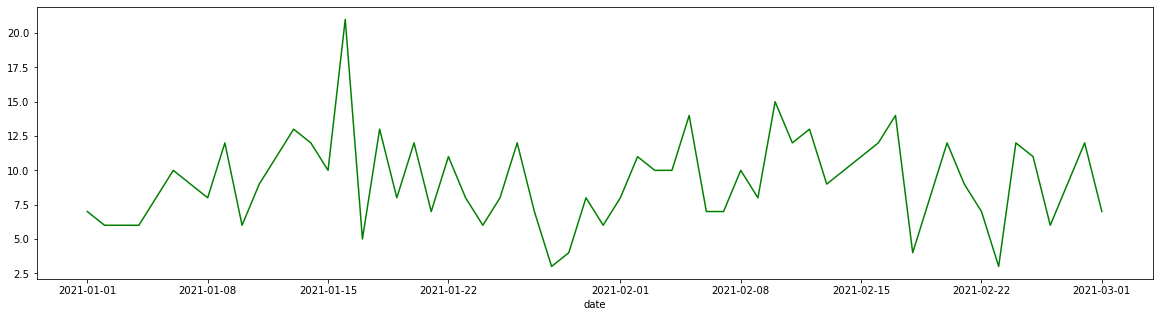

In [109]:
print(ds_positive.groupby('date').count()['sentiment'].plot(figsize=([20,5]), color='green'))

## DESCRIPTIVE STATISTICS

In [112]:
#function for counting basic stats per tweet
#count_words = counts number of words per tweet
#count_mentions = counts number of mentions (@) per tweet
#count_excl_question_marks = counts number of exclamation and question mark per tweet
#count_emojis = counts number of emojis per tweet
def counter(data):
    count_words = data.apply(lambda x: len(re.sub("@\w+","",x).split()))
    count_mentions = data.apply(lambda x: len(re.findall("@\w+",x)))
    count_excl_question_marks = data.apply(lambda x: len(re.findall("\!|\?",x)))
    count_emojis = data.apply(lambda x: emoji.demojize(x)).apply(lambda x: len(re.findall(":[a-z_&]+:", x)))
    temp_d = pd.DataFrame({'words_per_tweet' : count_words, 'mentions_per_tweet': count_mentions, 'excl_question_marks_per_tweet' :  count_excl_question_marks, 'emojis_per_tweet' : count_emojis})
    return temp_d
    
count_df = counter(d_copy['tweet'])
l = d_copy['lemmas'].apply(lambda x: len(re.sub("@\w+","",x).split()))
count_df['lemmas_per_tweet'] = l
count_df['sentiment'] = d_copy['sentiment']
count_df.head()

,words_per_tweet,mentions_per_tweet,excl_question_marks_per_tweet,emojis_per_tweet,lemmas_per_tweet,sentiment
0,7,1,0,0,4,0.5
1,13,0,0,0,7,1.0
2,34,0,0,0,21,0.5
3,23,1,2,0,8,0.0
4,49,1,3,0,22,0.0


In [119]:
def display_average_counter(count,title):
    count_df.groupby('sentiment')[count].mean().plot(kind='bar', color='#86bf91')
    plt.title(title)
    plt.show()

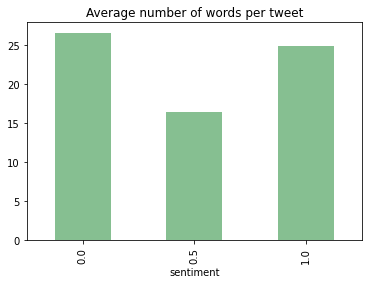

In [120]:
#Graph for Average number of words per tweet for better vizualization. 
#Everything except for the account tag (ex: @yandex_go) and empty spaces are COUNTED
display_average_counter('words_per_tweet',"Average number of words per tweet")

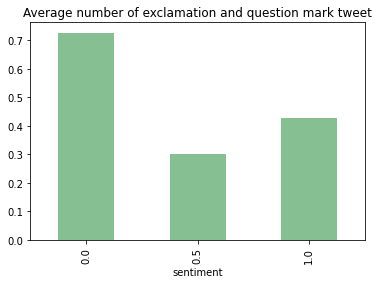

In [121]:
#Graph for Average number of exclamation and question mark per tweet for better vizualization. 
display_average_counter('excl_question_marks_per_tweet',"Average number of exclamation and question mark tweet")

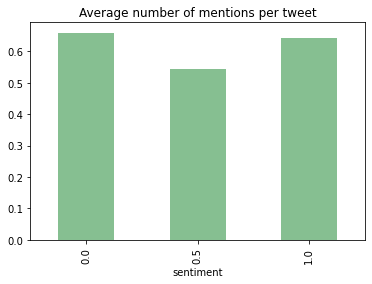

In [122]:
#Graph for Average number of mentions per tweet for better vizualization. 
display_average_counter('mentions_per_tweet',"Average number of mentions per tweet")

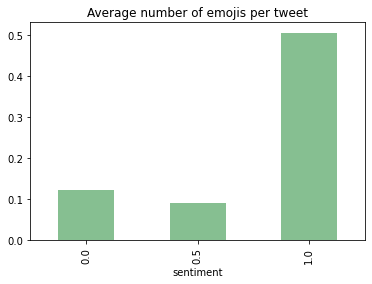

In [123]:
#Graph for Average number of mentions per tweet for better vizualization. 
display_average_counter('emojis_per_tweet',"Average number of emojis per tweet")

In [125]:
#graph that describes number of times 
def plot_counters(df, counter_name):  
    print('Descriptive stats for {}'.format(counter_name))
    print("-"*30)
    print(df.groupby('sentiment')[counter_name].describe())
    bins = np.arange(df[counter_name].min(), df[counter_name].max() + 1)
    g = sns.FacetGrid(df, 'sentiment', size=3, hue='sentiment')
    g = g.map(sns.distplot, counter_name , norm_hist=True ,kde=False, bins = bins)
    plt.show()


    


Descriptive stats for words_per_tweet
------------------------------
            count       mean        std  min   25%   50%   75%   max
sentiment                                                           
0.0        1606.0  26.615193  12.221226  1.0  17.0  26.0  37.0  53.0
0.5        1345.0  16.418587  11.034555  1.0   9.0  13.0  21.0  53.0
1.0         553.0  24.947559  12.603447  3.0  14.0  23.0  35.0  59.0


/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



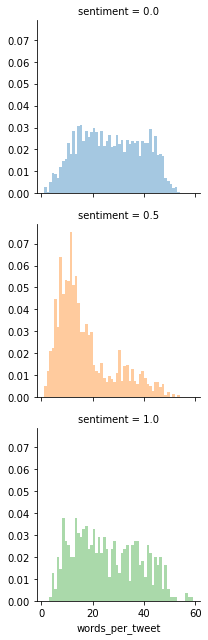

In [126]:
# biggest number of words per tweet is 59 (positive)
# the most common lenght of words per tweet among all 3 types of sentiment is 12
plot_counters(count_df, 'words_per_tweet')

Descriptive stats for mentions_per_tweet
------------------------------
            count      mean       std  min  25%  50%  75%  max
sentiment                                                     
0.0        1606.0  0.659402  0.950059  0.0  0.0  0.0  1.0  8.0
0.5        1345.0  0.542751  0.830856  0.0  0.0  0.0  1.0  6.0
1.0         553.0  0.641953  0.935518  0.0  0.0  0.0  1.0  6.0


/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



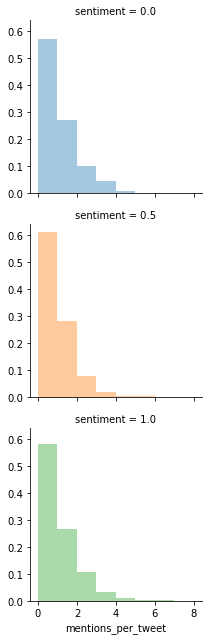

In [127]:
#most of the tweets doesn't consist of mentions.
plot_counters(count_df, 'mentions_per_tweet')

Descriptive stats for excl_question_marks_per_tweet
------------------------------
            count      mean       std  min  25%  50%  75%   max
sentiment                                                      
0.0        1606.0  0.726027  1.436388  0.0  0.0  0.0  1.0  21.0
0.5        1345.0  0.301115  0.722228  0.0  0.0  0.0  0.0   9.0
1.0         553.0  0.428571  1.089665  0.0  0.0  0.0  1.0  13.0


/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



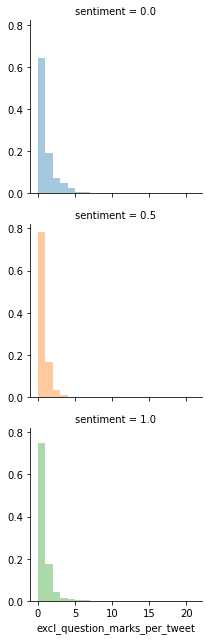

In [128]:
#the maximum number of explamation and question mark per tweet is 21 (negative)
#most of the tweets also doesnt consist of explamation and question mark
plot_counters(count_df, 'excl_question_marks_per_tweet')

Descriptive stats for emojis_per_tweet
------------------------------
            count      mean       std  min  25%  50%  75%   max
sentiment                                                      
0.0        1606.0  0.122042  0.562637  0.0  0.0  0.0  0.0  11.0
0.5        1345.0  0.089219  0.668873  0.0  0.0  0.0  0.0  20.0
1.0         553.0  0.506329  1.208535  0.0  0.0  0.0  1.0  18.0


/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/a10.12/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



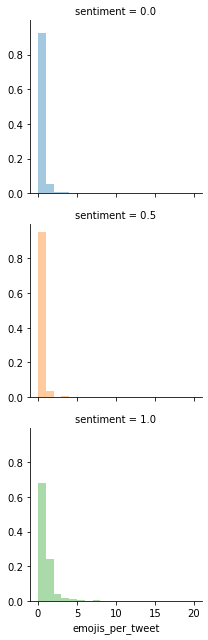

In [129]:
#positive tweets tend to have more emojis than negativej
plot_counters(count_df, 'emojis_per_tweet')

   punctuation  frequency
0            .       6758
1            ,       5866
2            /       3346
3            :       1543
4            -       1191
5            ?       1164
6            )        696
7            "        664
8            !        644
9            «        553
10           »        552


<AxesSubplot:xlabel='punctuation', ylabel='frequency'>

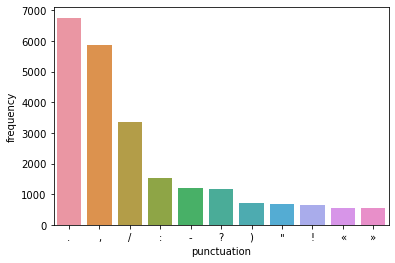

In [130]:
#number of different punctuations in tweets
new = d_copy['tweet'].apply(lambda x: re.findall("[^\w\s|@]",x))
punc = []
for i in new:
    for j in i:
        punc.append(j)
punctuation = (Counter(punc).most_common(11))
punc_df = pd.DataFrame(punctuation, columns = ['punctuation', 'frequency'])
print(punc_df)
sns.barplot(x='punctuation', y='frequency', data = punc_df)

In [132]:
#Distribution of number of words and number of lemmas per tweet
# most tweets tend have to 5-8 lemmas 
# range of words per tweet lies between 7 and 18
hist_data = [count_df['lemmas_per_tweet'],count_df['words_per_tweet']]
group_labels = ['lemmas_per_tweet','words_per_tweet']
fig = create_distplot(hist_data, group_labels )
fig.update_layout(title_text = 'Destribution of number of words and keywords')
fig.update_layout(autosize=False, width=900, height=700)
fig.show()
#fig.write_image("fig2.png")

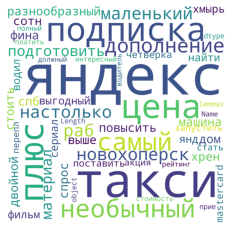

In [133]:
#A World cloud based on ALL words in the lemmas
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(str(d_copy['lemmas']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [134]:
#separating lemmas of different type of sentiment for further analysis
negative_words = d_copy[d_copy['sentiment'] == 0.0]['lemmas']
neutral_words = d_copy[d_copy['sentiment'] == 0.5]['lemmas']
positive_words = d_copy[d_copy['sentiment'] == 1.0]['lemmas']


##  TWEETS ANALYSIS (NEGATIVE AND POSITIVE)

In [135]:
def word_cloud(word_type, color):
    wordcloud = WordCloud(height=2000, width=2000, background_color=color)
    wordcloud = wordcloud.generate(str(negative_words[:100]))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


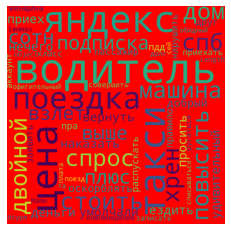

In [136]:
#most common negative words are [#see below]
word_cloud(str(negative_words[:100]), 'red')

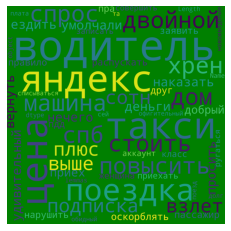

In [137]:
#most common positive words are [#see below]
word_cloud(str(positive_words[:100]), 'green')

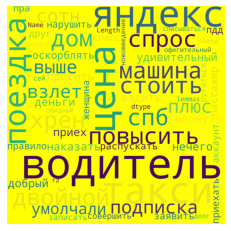

In [138]:
word_cloud(str(neutral_words[:100]), 'yellow')

In [139]:
#dataframe of most common words
sentiment_dict = {}
def word_frequency_df(sentiment):
    sentiment_split = sentiment.str.split(expand=True).stack().value_counts()
    sentiment_dict = dict(sentiment_split)
    sentiment_list = list(sentiment_dict.items())
    sentiment_df = pd.DataFrame(sentiment_list, columns = ['words','frequency'])
    return sentiment_df
    

In [149]:
#most common negative words
word_frequency_df(negative_words).head()

,words,frequency
0,такси,1452
1,яндекс,1321
2,водитель,489
3,машина,230
4,заказ,174


In [150]:
#most common positive
word_frequency_df(positive_words).head()

,words,frequency
0,такси,503
1,яндекс,465
2,водитель,164
3,машина,67
4,поездка,67


In [151]:
#most common neutral words
word_frequency_df(neutral_words).head()

,words,frequency
0,яндекс,1362
1,такси,1357
2,водитель,270
3,везти,107
4,поездка,98


In [157]:
#plotting most common words
def plot_frequent_words(data_df,sentiment_type):
    sns.barplot(x='words', y = 'frequency', data=data_df, color='salmon')
    plt.xticks(rotation=45)
    plt.title(sentiment_type)
    plt.show()
   

In [158]:
#plotting most common one ali
#plot_frequent_words(word_frequency_df(negative_words), 'Negative words frequency') 

In [159]:
#plotting most common positive words
#plot_frequent_words(word_frequency_df(positive_words), 'Positive words frequency') 

In [162]:
#find parts of speech for each tweets
def parts_of_speech(sentiment):
    sen = list(sentiment.keys())
    speech_parts = {}
    for i in sen:
        morph = morphy.parse(i)[0].tag
        morph = str(morph).split(',',1)[0]
        speech_parts[i] = morph
    return speech_parts


In [163]:
psn = parts_of_speech(dict(negative_words.str.split(expand=True).stack().value_counts()))
psp = parts_of_speech(dict(positive_words.str.split(expand=True).stack().value_counts()))

In [164]:

#plotting each parts of speach
def plot_parts_of_speech(ps_type,title):
    speech_parts_list = list(ps_type.items())
    speech_parts_df = pd.DataFrame(speech_parts_list,columns=['words','type'])
    ps = speech_parts_df.type.value_counts()
    print(ps)
    ps = ps.to_frame()
    ps.head(10).plot(kind='line')
    plt.legend('Parts of speech')
    plt.title(title)
    plt.show()


NOUN         2375
INFN         1525
ADJF          411
ADVB          257
ADJF masc     199
VERB          162
UNKN           70
LATN           68
COMP           24
ADJF femn      24
CONJ           21
ADJS           19
ADJF inan      16
PREP           16
PRTF           14
INTJ           13
PRCL           12
GRND            9
ADJS neut       8
NPRO            4
ADJF plur       4
ADJF neut       4
PRED            4
ADJS masc       3
PRTS            3
NUMR nomn       2
NUMR            2
NPRO sing       2
NUMR masc       1
ADVB Dist       1
INTJ Infr       1
NUMR accs       1
ADVB Infr       1
Name: type, dtype: int64


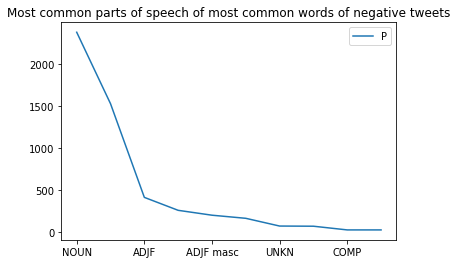

In [167]:
plot_parts_of_speech(psn, 'Most common parts of speech of most common words of negative tweets')

NOUN         1189
INFN          766
ADJF          218
ADVB          143
ADJF masc      87
VERB           49
UNKN           36
LATN           28
ADJS           14
CONJ           13
PREP           12
PRCL           11
ADJF femn      11
COMP            9
INTJ            8
PRTF            8
ADJF inan       7
ADJS neut       4
GRND            4
NUMR nomn       2
ADJS masc       2
NPRO sing       2
ADVB Infr       2
NPRO plur       1
NUMR masc       1
NPRO            1
ADJF plur       1
ADJF neut       1
CONJ Dist       1
NUMR            1
PRTS            1
ADJS femn       1
PRED            1
Name: type, dtype: int64


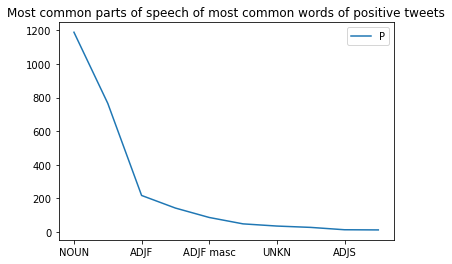

In [168]:
plot_parts_of_speech(psp, 'Most common parts of speech of most common words of positive tweets')